# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import datetime
from scipy.stats import linregress
import os 
from api_keys import g_key


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [28]:
cities

['souillac',
 'avera',
 'leningradskiy',
 'iqaluit',
 'karkaralinsk',
 'albany',
 'lebu',
 'quebo',
 'tasiilaq',
 'hilo',
 'hithadhoo',
 'dinguiraye',
 'raga',
 'tumannyy',
 'lolua',
 'thompson',
 'gilgit',
 'qaanaaq',
 'half moon bay',
 'nikolskoye',
 'sentyabrskiy',
 'atuona',
 'viedma',
 'touros',
 'bluff',
 'hervey bay',
 'port alfred',
 'mys shmidta',
 'khuzhir',
 'luderitz',
 'kahului',
 'skagen',
 'champerico',
 'conceicao do araguaia',
 'palabuhanratu',
 'lasa',
 'bandundu',
 'tazmalt',
 'georgetown',
 'barra do garcas',
 'aasiaat',
 'fairbanks',
 'ushuaia',
 'kargil',
 'punta arenas',
 'belushya guba',
 'naze',
 'severo-kurilsk',
 'busselton',
 'hobart',
 'taolanaro',
 'mujiayingzi',
 'isangel',
 'saskylakh',
 'grand river south east',
 'new norfolk',
 'hobyo',
 'avarua',
 'palana',
 'crowley',
 'provideniya',
 'ostrovnoy',
 'shingu',
 'dawei',
 'faanui',
 'mataura',
 'fortuna',
 'tungor',
 'xichang',
 'rikitea',
 'puerto ayora',
 'riyadh',
 'barrow',
 'cap malheureux',
 'ball

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [30]:
city_loc = []
city_counter = 1
city_set = 1

#loop through city list(count=creating set)
for count,ele in enumerate(cities): 
    print (count,ele)
    #grouping the cities in sets of 50.
    if (count % 50 == 0 and count >= 50):
        city_set += 1
        city_counter = 0

        
    #adding to the end of the url(ele=city names)
    city_url = url + "&q=" + ele
    print("Processing Record %s of Set %s | %s" % (city_counter, city_set, ele))
    
    #increase city counter
    city_counter += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weath = requests.get(city_url).json()
        
        #country, lon, lat, temp, humidity, cloud factor, wind, date
        country= city_weath["sys"]["country"]
        date= city_weath["dt"]
        lon= city_weath["coord"]["lon"]
        lat= city_weath["coord"]["lat"]
        temp = city_weath["main"]["temp_max"]
        humidity = city_weath["main"]["humidity"]
        cloud_factor = city_weath["clouds"]["all"]
        wind = city_weath["wind"]["speed"]
        
        #append info above into a dict.
        
        city_loc.append({"City":ele,
                        "Country":country,
                        "Date":date,
                        "Longitude":lon,
                        "Latitude":lat,
                        "Max Temperature":temp,
                        "Humidity": humidity,
                        "Cloudiness": cloud_factor,
                        "Wind speed": wind})
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
    



0 souillac
Processing Record 1 of Set 1 | souillac
1 avera
Processing Record 2 of Set 1 | avera
2 leningradskiy
Processing Record 3 of Set 1 | leningradskiy
3 iqaluit
Processing Record 4 of Set 1 | iqaluit
4 karkaralinsk
Processing Record 5 of Set 1 | karkaralinsk
City not found. Skipping...
5 albany
Processing Record 6 of Set 1 | albany
6 lebu
Processing Record 7 of Set 1 | lebu
7 quebo
Processing Record 8 of Set 1 | quebo
8 tasiilaq
Processing Record 9 of Set 1 | tasiilaq
9 hilo
Processing Record 10 of Set 1 | hilo
10 hithadhoo
Processing Record 11 of Set 1 | hithadhoo
11 dinguiraye
Processing Record 12 of Set 1 | dinguiraye
12 raga
Processing Record 13 of Set 1 | raga
13 tumannyy
Processing Record 14 of Set 1 | tumannyy
City not found. Skipping...
14 lolua
Processing Record 15 of Set 1 | lolua
City not found. Skipping...
15 thompson
Processing Record 16 of Set 1 | thompson
16 gilgit
Processing Record 17 of Set 1 | gilgit
17 qaanaaq
Processing Record 18 of Set 1 | qaanaaq
18 half moo

144 ixtapa
Processing Record 44 of Set 3 | ixtapa
145 east london
Processing Record 45 of Set 3 | east london
146 yellowknife
Processing Record 46 of Set 3 | yellowknife
147 te anau
Processing Record 47 of Set 3 | te anau
148 camapua
Processing Record 48 of Set 3 | camapua
149 kieta
Processing Record 49 of Set 3 | kieta
150 barentsburg
Processing Record 0 of Set 4 | barentsburg
City not found. Skipping...
151 talaya
Processing Record 1 of Set 4 | talaya
152 tateyama
Processing Record 2 of Set 4 | tateyama
153 upernavik
Processing Record 3 of Set 4 | upernavik
154 safranbolu
Processing Record 4 of Set 4 | safranbolu
155 umzimvubu
Processing Record 5 of Set 4 | umzimvubu
City not found. Skipping...
156 codrington
Processing Record 6 of Set 4 | codrington
157 aykhal
Processing Record 7 of Set 4 | aykhal
158 ambulu
Processing Record 8 of Set 4 | ambulu
159 kungurtug
Processing Record 9 of Set 4 | kungurtug
160 beringovskiy
Processing Record 10 of Set 4 | beringovskiy
161 samusu
Processing 

288 namtsy
Processing Record 38 of Set 6 | namtsy
289 kupang
Processing Record 39 of Set 6 | kupang
290 zhezkazgan
Processing Record 40 of Set 6 | zhezkazgan
291 kokkola
Processing Record 41 of Set 6 | kokkola
292 los llanos de aridane
Processing Record 42 of Set 6 | los llanos de aridane
293 tsihombe
Processing Record 43 of Set 6 | tsihombe
City not found. Skipping...
294 amderma
Processing Record 44 of Set 6 | amderma
City not found. Skipping...
295 ballina
Processing Record 45 of Set 6 | ballina
296 zapolyarnyy
Processing Record 46 of Set 6 | zapolyarnyy
297 merauke
Processing Record 47 of Set 6 | merauke
298 suntar
Processing Record 48 of Set 6 | suntar
299 helong
Processing Record 49 of Set 6 | helong
300 oranjemund
Processing Record 0 of Set 7 | oranjemund
301 rocha
Processing Record 1 of Set 7 | rocha
302 belmonte
Processing Record 2 of Set 7 | belmonte
303 tiko
Processing Record 3 of Set 7 | tiko
304 linxia
Processing Record 4 of Set 7 | linxia
305 kloulklubed
Processing Record

436 taree
Processing Record 36 of Set 9 | taree
437 sundargarh
Processing Record 37 of Set 9 | sundargarh
438 litoral del san juan
Processing Record 38 of Set 9 | litoral del san juan
City not found. Skipping...
439 waingapu
Processing Record 39 of Set 9 | waingapu
440 aloleng
Processing Record 40 of Set 9 | aloleng
441 valley city
Processing Record 41 of Set 9 | valley city
442 ust-omchug
Processing Record 42 of Set 9 | ust-omchug
443 macherla
Processing Record 43 of Set 9 | macherla
444 kaeo
Processing Record 44 of Set 9 | kaeo
445 freeport
Processing Record 45 of Set 9 | freeport
446 wanxian
Processing Record 46 of Set 9 | wanxian
447 umm durman
Processing Record 47 of Set 9 | umm durman
City not found. Skipping...
448 cabo rojo
Processing Record 48 of Set 9 | cabo rojo
449 richards bay
Processing Record 49 of Set 9 | richards bay
450 grand centre
Processing Record 0 of Set 10 | grand centre
City not found. Skipping...
451 poya
Processing Record 1 of Set 10 | poya
452 nabire
Process

581 lac du bonnet
Processing Record 31 of Set 12 | lac du bonnet
582 tambacounda
Processing Record 32 of Set 12 | tambacounda
583 mount gambier
Processing Record 33 of Set 12 | mount gambier
584 tayoltita
Processing Record 34 of Set 12 | tayoltita
585 punta alta
Processing Record 35 of Set 12 | punta alta
586 talavera
Processing Record 36 of Set 12 | talavera
587 gat
Processing Record 37 of Set 12 | gat
588 arlit
Processing Record 38 of Set 12 | arlit
589 sept-iles
Processing Record 39 of Set 12 | sept-iles
590 bandarbeyla
Processing Record 40 of Set 12 | bandarbeyla
591 bengkulu
Processing Record 41 of Set 12 | bengkulu
592 sesvete
Processing Record 42 of Set 12 | sesvete
593 tankara
Processing Record 43 of Set 12 | tankara
594 lazaro cardenas
Processing Record 44 of Set 12 | lazaro cardenas
595 marsabit
Processing Record 45 of Set 12 | marsabit
596 galle
Processing Record 46 of Set 12 | galle
597 dickinson
Processing Record 47 of Set 12 | dickinson
598 laguna de perlas
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
city_df = pd.DataFrame(city_loc)
city_df.head()

,City,Country,Date,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind speed
0,souillac,MU,1584846666,57.52,-20.52,75.00,88,75,2.24
1,avera,US,1584846667,-82.53,33.19,71.60,56,1,6.93
2,leningradskiy,RU,1584846667,178.42,69.38,1.15,77,100,5.48
3,iqaluit,CA,1584846667,-68.51,63.75,-9.00,69,75,9.17
4,albany,US,1584846302,-73.97,42.60,32.00,39,1,10.29


In [32]:
# Extract relevant fields from the data frame
lats = city_df["Latitude"]
max_temps = city_df["Max Temperature"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind speed"]

In [33]:
# Export the City_Data into a csv
city_df.to_csv(output_data_file, index_label="City_ID")
# Show Record Count
city_df.count()

City               576
Country            576
Date               576
Longitude          576
Latitude           576
Max Temperature    576
Humidity           576
Cloudiness         576
Wind speed         576
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

This scatter plot shows the relationship between the maximum temperature and latitude


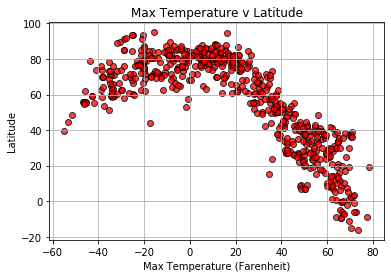

In [34]:
plt.scatter(lats, max_temps, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.grid()
plt.title("Max Temperature v Latitude")
plt.xlabel("Max Temperature (Farenheit)")
plt.ylabel("Latitude")
plt.savefig("output_data/fig1.png")
print("This scatter plot shows the relationship between the maximum temperature and latitude")

#### Latitude vs. Humidity Plot

This scatter plot shows the relationship between the latitude and humidity


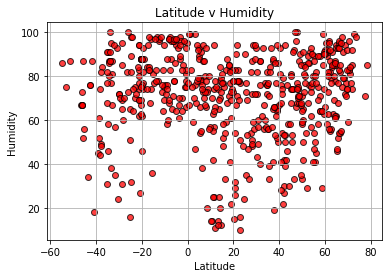

In [35]:
plt.scatter(lats,humidity, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/fig2.png")
print("This scatter plot shows the relationship between the latitude and humidity")

#### Latitude vs. Cloudiness Plot

This scatter plot shows the relationship between the latitude and cloudliness


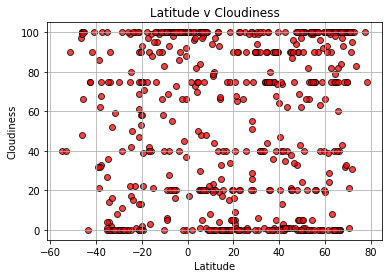

In [36]:
plt.scatter(lats, cloudiness, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/fig3.png")
print("This scatter plot shows the relationship between the latitude and cloudliness")

#### Latitude vs. Wind Speed Plot

This scatter plot shows the relationship between the latitude and wind speed


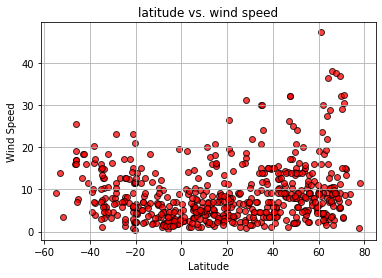

In [37]:
today = time.strftime("%m/%d/%Y")
plt.scatter(lats,wind_speed, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("latitude vs. wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/fig4.png")
print("This scatter plot shows the relationship between the latitude and wind speed")

## Linear Regression

In [38]:
city_df

,City,Country,Date,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind speed
0,souillac,MU,1584846666,57.52,-20.52,75.00,88,75,2.24
1,avera,US,1584846667,-82.53,33.19,71.60,56,1,6.93
2,leningradskiy,RU,1584846667,178.42,69.38,1.15,77,100,5.48
3,iqaluit,CA,1584846667,-68.51,63.75,-9.00,69,75,9.17
4,albany,US,1584846302,-73.97,42.60,32.00,39,1,10.29
...,...,...,...,...,...,...,...,...,...
571,wanning,CN,1584846753,110.40,18.80,81.43,69,0,13.49
572,mwinilunga,ZM,1584846753,24.43,-11.74,62.71,98,100,3.27
573,somerset,US,1584846753,-74.55,40.57,45.00,41,75,4.70
574,darhan,MN,1584846753,105.92,49.49,41.29,35,0,8.50


In [39]:
# OPTIONAL: Create a function to create Linear Regression plots
nothern = city_df.loc[city_df["Latitude"] >= 0.0, :]
nothern.reset_index(inplace=True)

southern = city_df.loc[city_df["Latitude"] < 0.0, :]
southern.reset_index(inplace=True)


In [40]:
nothern.describe()

,index,Date,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind speed
count,393.000000,3.930000e+02,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,296.040712,1.584847e+09,11.017455,38.256005,48.036590,69.066158,52.020356,9.297099
std,166.731693,9.080448e+01,86.591247,21.042515,27.029112,20.043084,40.435128,7.257798
min,1.000000,1.584846e+09,-179.170000,0.130000,-16.130000,10.000000,0.000000,0.780000
25%,152.000000,1.584847e+09,-68.580000,18.800000,27.250000,57.000000,5.000000,4.380000
50%,301.000000,1.584847e+09,15.640000,40.040000,48.990000,74.000000,62.000000,7.470000
75%,442.000000,1.584847e+09,81.820000,56.180000,75.200000,84.000000,94.000000,11.970000
max,575.000000,1.584847e+09,179.320000,78.220000,94.390000,100.000000,100.000000,47.200000


In [41]:
southern.describe()

,index,Date,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind speed
count,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,269.158470,1.584847e+09,31.102842,-21.280109,72.901803,75.786885,55.513661,7.773443
std,164.710575,8.085351e+01,94.984961,13.348015,10.743084,17.598184,38.770791,5.493438
min,0.000000,1.584846e+09,-175.200000,-54.800000,39.200000,16.000000,0.000000,0.400000
25%,133.000000,1.584847e+09,-53.635000,-32.520000,65.680000,67.500000,16.500000,3.200000
50%,257.000000,1.584847e+09,24.180000,-20.340000,73.510000,77.000000,66.000000,6.440000
75%,407.500000,1.584847e+09,133.235000,-9.385000,80.600000,88.000000,97.000000,11.410000
max,572.000000,1.584847e+09,173.780000,-0.480000,95.000000,100.000000,100.000000,25.430000


In [42]:
# Create Northern and Southern Hemisphere DataFrames
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9073639383303262


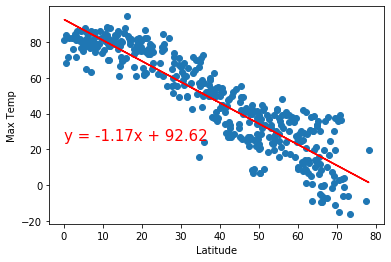

In [43]:
Nx_axis = nothern['Latitude'] 
Ny_axis = nothern['Max Temperature']   
xlbl = "Latitude" 
ylbl = "Max Temp" 
lblpos = (0,25)
ifig = 'N_MaxTemp_vs_Lat' 
plotLinearRegression(Nx_axis, Ny_axis,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5145756656395858


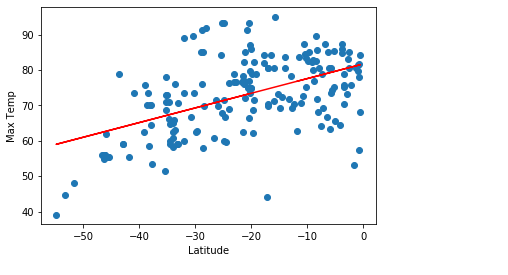

In [44]:
Sx_axis = southern['Latitude'] 
Sy_axis = southern['Max Temperature']   
xlbl = "Latitude" 
ylbl = "Max Temp" 
lblpos = (0,25) 
ifig = 'N_MaxTemp_vs_Lat' 
plotLinearRegression(Sx_axis, Sy_axis,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20645601248852363


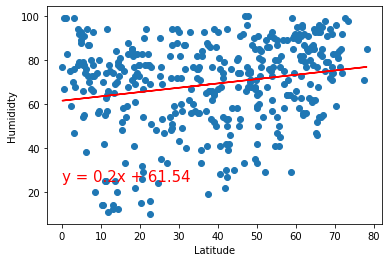

In [45]:
Nx_axis = nothern['Latitude'] 
Ny_axis = nothern['Humidity']   
xlbl = "Latitude" 
ylbl = "Humididty" 
lblpos = (0,25) 
ifig = 'N_Humidity_vs_Lat' 
plotLinearRegression(Nx_axis, Ny_axis,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20645601248852363


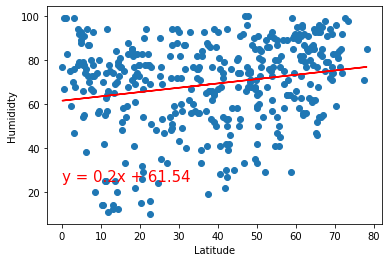

In [46]:
Sx_axis = nothern['Latitude'] 
Sy_axis = nothern['Humidity']   
xlbl = "Latitude" 
ylbl = "Humididty" 
lblpos = (0,25) 
ifig = 'N__Humidity vs_Lat' 
plotLinearRegression(Sx_axis, Sy_axis,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16737415389425314


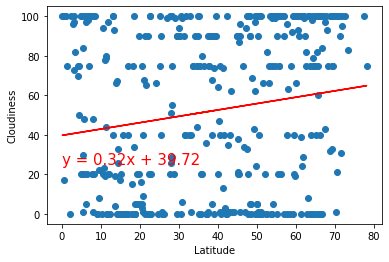

In [47]:
Nx_axis = nothern['Latitude'] 
Ny_axis = nothern['Cloudiness']   
xlbl = "Latitude" 
ylbl = "Cloudiness" 
lblpos = (0,25) 
ifig = 'N_Cloudiness_vs_Lat' 
plotLinearRegression(Nx_axis, Ny_axis,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16737415389425314


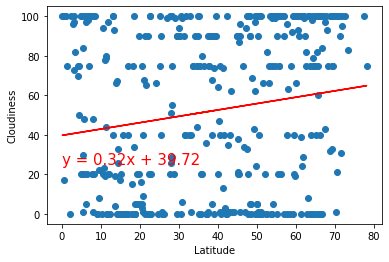

In [48]:
Sx_axis = nothern['Latitude'] 
Sy_axis = nothern['Cloudiness']   
xlbl = "Latitude" 
ylbl = "Cloudiness" 
lblpos = (0,25) 
ifig = 'S_Cloudiness_vs_Lat' 
plotLinearRegression(Sx_axis, Sy_axis,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.25908151559332315


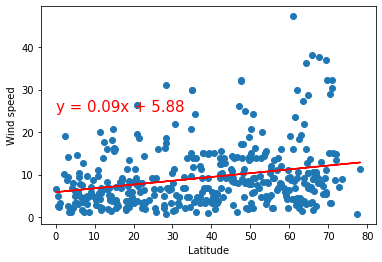

In [49]:
Nx_axis = nothern['Latitude'] 
Ny_axis = nothern['Wind speed']   
xlbl = "Latitude" 
ylbl = "Wind speed" 
lblpos = (0,25) 
ifig = 'N_Wind_speed_vs_Lat' 
plotLinearRegression(Nx_axis, Ny_axis,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.48428237581785744


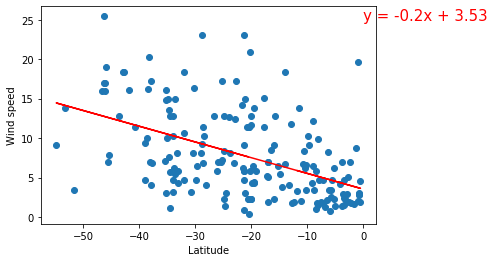

In [50]:
Sx_axis = southern['Latitude'] 
Sy_axis = southern['Wind speed']   
xlbl = "Latitude" 
ylbl = "Wind speed" 
lblpos = (0,25) 
ifig = 'S_Wind_speed_vs_Lat' 
plotLinearRegression(Sx_axis, Sy_axis,xlbl,ylbl,lblpos,ifig)